## Analisis de Ritmo Circadiano.
El ritmo circadiano es una variable de confusión en la mayor parte de la fisiología y es importante tenerla en cuenta como característica, especialmente porque existe una conexión conocida entre el ritmo circadiano y la glucosa en sangre.
La frecuencia cardiaca y la acelerometría se han utilizado anteriormente para determinar los estados de vigilia frente a los de sueño.

In [463]:
PACIENTE = '015'
PATH_FOLDER = 'G:\\Dataset\\big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2\\'+PACIENTE+'\\'

In [464]:
import pandas as pd
import numpy as np

# Read the two CSV files
ACC = pd.read_csv(PATH_FOLDER + 'ACC_'+PACIENTE+'.csv')
HR = pd.read_csv(PATH_FOLDER + 'HR_'+PACIENTE+'.csv')

### Aplicamos el Resample

In [465]:
# Convertimos en fechas los datimetimes
ACC['datetime'] = pd.to_datetime(ACC['datetime'])
HR['datetime'] = pd.to_datetime(HR['datetime'])

In [466]:
print(ACC.columns)

## Añadimos el valor de la magnitud
ACC["magnitude"] = np.sqrt(ACC[' acc_x']**2 + ACC[' acc_y']**2 + ACC[' acc_z']**2)

ACC.head()

Index(['datetime', ' acc_x', ' acc_y', ' acc_z'], dtype='object')


,datetime,acc_x,acc_y,acc_z,magnitude
0,2020-07-24 07:07:49.000000,1.0,23.0,-59.0,63.332456
1,2020-07-24 07:07:49.031250,0.0,23.0,-60.0,64.257295
2,2020-07-24 07:07:49.062500,-1.0,23.0,-59.0,63.332456
3,2020-07-24 07:07:49.093750,-4.0,23.0,-56.0,60.671245
4,2020-07-24 07:07:49.125000,-6.0,23.0,-55.0,59.916609


In [467]:
# Resamplear y calcular la media y desviación estándar por minuto y hora para Heart Rate
hr_resampled_min = HR.resample('T', on='datetime').agg({' hr': ['mean', 'std']})
hr_resampled_hour = HR.resample('H', on='datetime').agg({' hr': ['mean', 'std']})

# Resamplear y calcular la media y desviación estándar por minuto y hora para Acelerometría
acc_resampled_min = ACC.resample('T', on='datetime').agg({'magnitude': ['mean', 'std']})
acc_resampled_hour = ACC.resample('H', on='datetime').agg({'magnitude': ['mean', 'std']})

In [468]:
# Calcular la media diaria de Heart Rate y Acelerometría para cada día
daily_stats_hr = HR.set_index('datetime').resample('D').agg({' hr': ['mean', 'std']})
daily_stats_acc = ACC.set_index('datetime').resample('D').agg({'magnitude': ['mean', 'std']})

In [469]:
# Combinamos la acelerometria y el ritmo cardiaco por minuto y por horas en 2 diferentes datasets
combined_df_min = pd.merge(acc_resampled_min, hr_resampled_min, on='datetime')
combined_df_min.head()

magnitude                   hr          
                          mean       std       mean       std
datetime                                                     
2020-07-05 15:11:00  65.788583  9.420605  88.051892  5.577825
2020-07-05 15:12:00  65.130904  5.756186  91.720833  2.351012
2020-07-05 15:13:00  65.341758  3.725038  86.252667  4.096564
2020-07-05 15:14:00  65.407164  0.955654  87.847000  2.924220
2020-07-05 15:15:00  65.445970  3.432828  88.148167  1.656107

In [470]:
combined_df_hour = pd.merge(acc_resampled_hour, hr_resampled_hour, on='datetime')
combined_df_hour.head()

magnitude                   hr           
                          mean       std       mean        std
datetime                                                      
2020-07-05 15:00:00  65.529903  8.231945  87.107432   7.764608
2020-07-05 16:00:00  65.484364  5.730069  87.393519  12.044741
2020-07-05 17:00:00  65.008310  6.971192  92.909047  11.294148
2020-07-05 18:00:00  65.294064  3.041116  86.043358   7.164140
2020-07-05 19:00:00  64.967033  1.670880  86.061656   7.018286

### Vamos a crear la funcion para añadir el indicador

In [471]:
# Renombrar las columnas para mayor claridad
combined_df_min.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df_min.columns.values]
combined_df_hour.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df_hour.columns.values]

In [472]:
combined_df_min['indicator_ritmo_circadiano'] = 1
combined_df_hour['indicator_ritmo_circadiano'] = 1

In [473]:
combined_df_min.head(5)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano
datetime,,,,,
2020-07-05 15:11:00,65.788583,9.420605,88.051892,5.577825,1
2020-07-05 15:12:00,65.130904,5.756186,91.720833,2.351012,1
2020-07-05 15:13:00,65.341758,3.725038,86.252667,4.096564,1
2020-07-05 15:14:00,65.407164,0.955654,87.847000,2.924220,1
2020-07-05 15:15:00,65.445970,3.432828,88.148167,1.656107,1


In [474]:
combined_df_hour.head(5)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano
datetime,,,,,
2020-07-05 15:00:00,65.529903,8.231945,87.107432,7.764608,1
2020-07-05 16:00:00,65.484364,5.730069,87.393519,12.044741,1
2020-07-05 17:00:00,65.008310,6.971192,92.909047,11.294148,1
2020-07-05 18:00:00,65.294064,3.041116,86.043358,7.164140,1
2020-07-05 19:00:00,64.967033,1.670880,86.061656,7.018286,1


In [475]:
daily_stats_hr.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in daily_stats_hr.columns.values]
daily_stats_acc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in daily_stats_acc.columns.values]


In [476]:
daily_stats_acc.head()

,magnitude_mean,magnitude_std
datetime,,
2020-07-05,65.094079,5.531389
2020-07-06,64.649646,4.661110
2020-07-07,64.035461,3.816063
2020-07-08,NaN,NaN
2020-07-09,NaN,NaN


In [477]:
daily_stats_hr.head()

,hr_mean,hr_std
datetime,,
2020-07-05,88.681149,8.620808
2020-07-06,83.660710,10.739436
2020-07-07,81.339554,11.505549
2020-07-08,NaN,NaN
2020-07-09,NaN,NaN


In [478]:
combined_df_min['date'] = combined_df_min.index.date
combined_df_hour['date'] = combined_df_hour.index.date
combined_df_min.head()



,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date
datetime,,,,,,
2020-07-05 15:11:00,65.788583,9.420605,88.051892,5.577825,1,2020-07-05
2020-07-05 15:12:00,65.130904,5.756186,91.720833,2.351012,1,2020-07-05
2020-07-05 15:13:00,65.341758,3.725038,86.252667,4.096564,1,2020-07-05
2020-07-05 15:14:00,65.407164,0.955654,87.847000,2.924220,1,2020-07-05
2020-07-05 15:15:00,65.445970,3.432828,88.148167,1.656107,1,2020-07-05


In [479]:
# Cubrimos con 0 los NaN
combined_df_min['hr_mean'] = combined_df_min['hr_mean'].fillna(0)
combined_df_min['hr_std'] = combined_df_min['hr_std'].fillna(0)
combined_df_min['magnitude_mean'] = combined_df_min['magnitude_mean'].fillna(0)
combined_df_min['magnitude_std'] = combined_df_min['magnitude_std'].fillna(0)

combined_df_hour['hr_mean'] = combined_df_hour['hr_mean'].fillna(0)
combined_df_hour['hr_std'] = combined_df_hour['hr_std'].fillna(0)
combined_df_hour['magnitude_mean'] = combined_df_hour['magnitude_mean'].fillna(0)
combined_df_hour['magnitude_std'] = combined_df_hour['magnitude_std'].fillna(0)

In [480]:
# Función para agregar la columna indicador
def add_indicator_ritmo_circadiano(df_resampled, daily_stats_hr, daily_stats_acc):
    df_resampled['hr_mean_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['hr_mean'] < daily_stats_hr.loc[str(row['date']), 'hr_mean']) else 0, axis=1
    )
    df_resampled['hr_std_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['hr_std'] < daily_stats_hr.loc[str(row['date']), 'hr_std']) else 0, axis=1
    )
    df_resampled['magnitude_mean_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['magnitude_mean'] < daily_stats_acc.loc[str(row['date']), 'magnitude_mean']) else 0, axis=1
    )
    df_resampled['magnitude_std_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['magnitude_std'] < daily_stats_acc.loc[str(row['date']), 'magnitude_std']) else 0, axis=1
    )
    df_resampled['sum_indicator'] = df_resampled['hr_mean_indicator'] + df_resampled['hr_std_indicator'] + df_resampled['magnitude_mean_indicator'] + df_resampled['magnitude_std_indicator']
    df_resampled['indicator_ritmo_circadiano'] = df_resampled.apply( lambda x: 0 if (x['sum_indicator']>=2) else 1, axis=1)
    return df_resampled

In [481]:
# Agregar la columna indicador a los DataFrames combinados
combined_df_min = add_indicator_ritmo_circadiano(combined_df_min, daily_stats_hr, daily_stats_acc)
combined_df_hour = add_indicator_ritmo_circadiano(combined_df_hour, daily_stats_hr, daily_stats_acc)


In [482]:
combined_df_min.head(10)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date,hr_mean_indicator,hr_std_indicator,magnitude_mean_indicator,magnitude_std_indicator,sum_indicator
datetime,,,,,,,,,,,
2020-07-05 15:11:00,65.788583,9.420605,88.051892,5.577825,0,2020-07-05,1,1,0,0,2
2020-07-05 15:12:00,65.130904,5.756186,91.720833,2.351012,1,2020-07-05,0,1,0,0,1
2020-07-05 15:13:00,65.341758,3.725038,86.252667,4.096564,0,2020-07-05,1,1,0,1,3
2020-07-05 15:14:00,65.407164,0.955654,87.847000,2.924220,0,2020-07-05,1,1,0,1,3
2020-07-05 15:15:00,65.445970,3.432828,88.148167,1.656107,0,2020-07-05,1,1,0,1,3
2020-07-05 15:16:00,65.349500,5.684387,104.056167,4.895234,1,2020-07-05,0,1,0,0,1
2020-07-05 15:17:00,65.399461,1.390471,92.086667,6.695129,0,2020-07-05,0,1,0,1,2
2020-07-05 15:18:00,65.498566,0.866134,85.184167,1.369603,0,2020-07-05,1,1,0,1,3
2020-07-05 15:19:00,65.558293,4.308318,88.434000,0.342668,0,2020-07-05,1,1,0,1,3


In [483]:
combined_df_hour.head(30)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date,hr_mean_indicator,hr_std_indicator,magnitude_mean_indicator,magnitude_std_indicator,sum_indicator
datetime,,,,,,,,,,,
2020-07-05 15:00:00,65.529903,8.231945,87.107432,7.764608,0,2020-07-05,1,1,0,0,2
2020-07-05 16:00:00,65.484364,5.730069,87.393519,12.044741,1,2020-07-05,1,0,0,0,1
2020-07-05 17:00:00,65.008310,6.971192,92.909047,11.294148,1,2020-07-05,0,0,1,0,1
2020-07-05 18:00:00,65.294064,3.041116,86.043358,7.164140,0,2020-07-05,1,1,0,1,3
2020-07-05 19:00:00,64.967033,1.670880,86.061656,7.018286,0,2020-07-05,1,1,1,1,4
2020-07-05 20:00:00,65.679021,7.883305,85.747272,8.976035,1,2020-07-05,1,0,0,0,1
2020-07-05 21:00:00,65.905377,7.098158,89.374128,8.495999,1,2020-07-05,0,1,0,0,1
2020-07-05 22:00:00,64.412327,2.010118,90.795614,3.676974,0,2020-07-05,0,1,1,1,3
2020-07-05 23:00:00,63.647782,0.763258,92.399744,1.956739,0,2020-07-05,0,1,1,1,3


### Veamos algunas graficas

In [484]:
import matplotlib.pyplot as plt

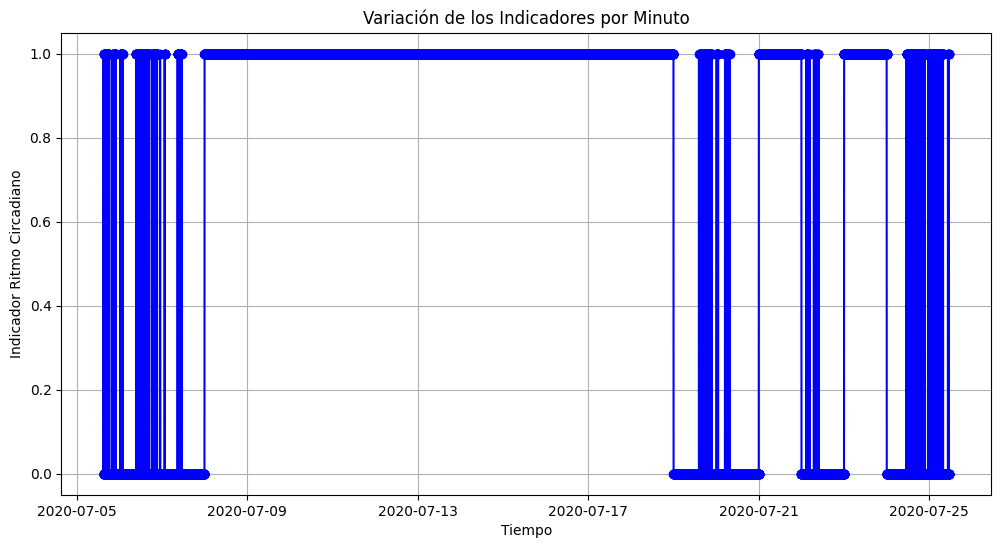

In [485]:
# Generar la gráfica de cómo varían los indicadores de los minutos
plt.figure(figsize=(12, 6))
plt.plot(combined_df_min.index, combined_df_min['indicator_ritmo_circadiano'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Indicador Ritmo Circadiano')
plt.title('Variación de los Indicadores por Minuto')
plt.grid(True)
plt.show()

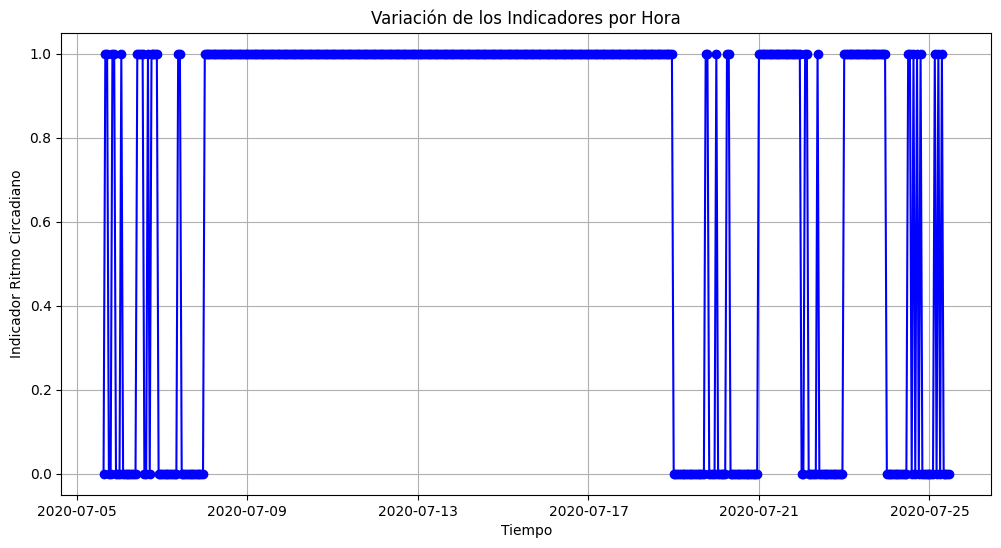

In [486]:
# Generar la gráfica de cómo varían los indicadores de los minutos
plt.figure(figsize=(12, 6))
plt.plot(combined_df_hour.index, combined_df_hour['indicator_ritmo_circadiano'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Indicador Ritmo Circadiano')
plt.title('Variación de los Indicadores por Hora')
plt.grid(True)
plt.show()

### Graficas de HR y Magnitud
Vamos a verificar donde suceden las pendientes de estos datos

#### Primero por Minutos

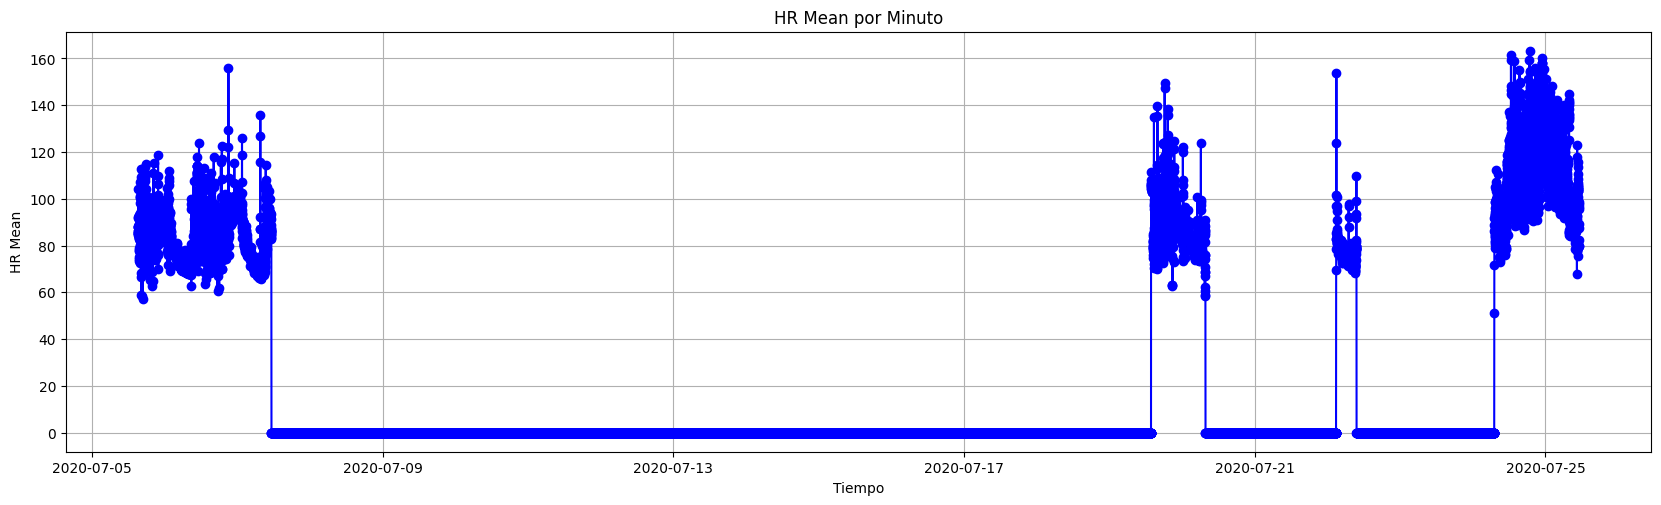

In [487]:
# Graficar hr_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['hr_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Mean')
plt.title('HR Mean por Minuto')
plt.grid(True)

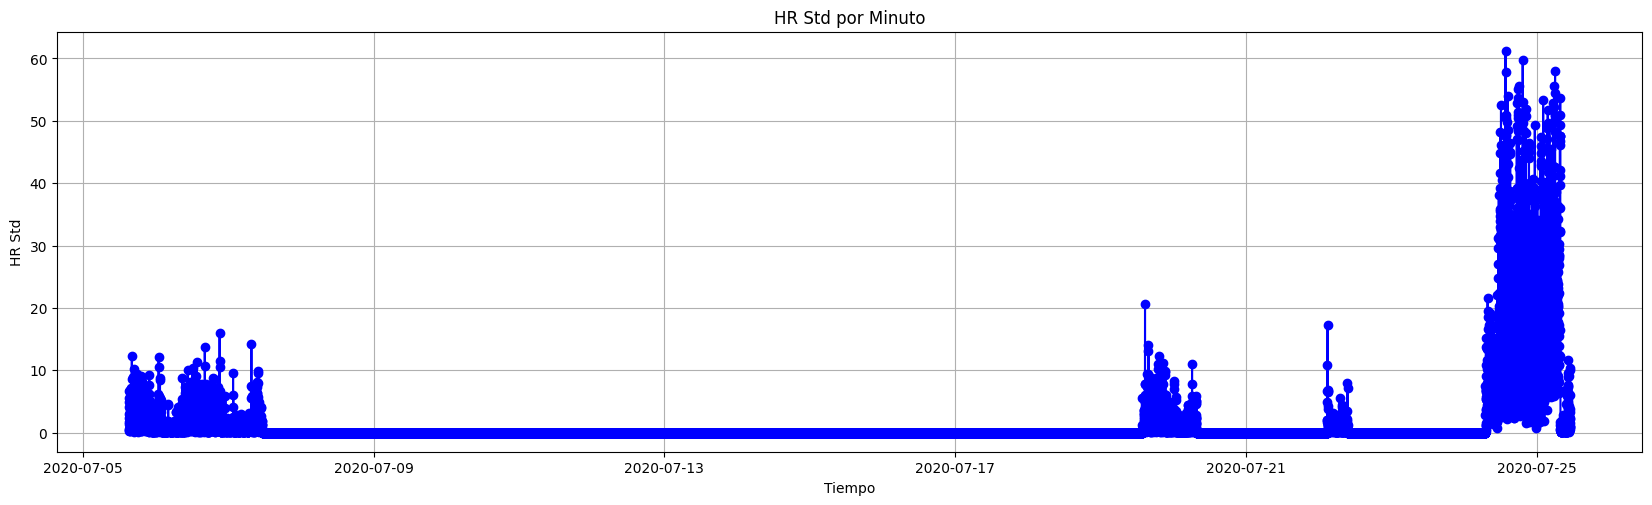

In [488]:
# Graficar hr_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['hr_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Std')
plt.title('HR Std por Minuto')
plt.grid(True)

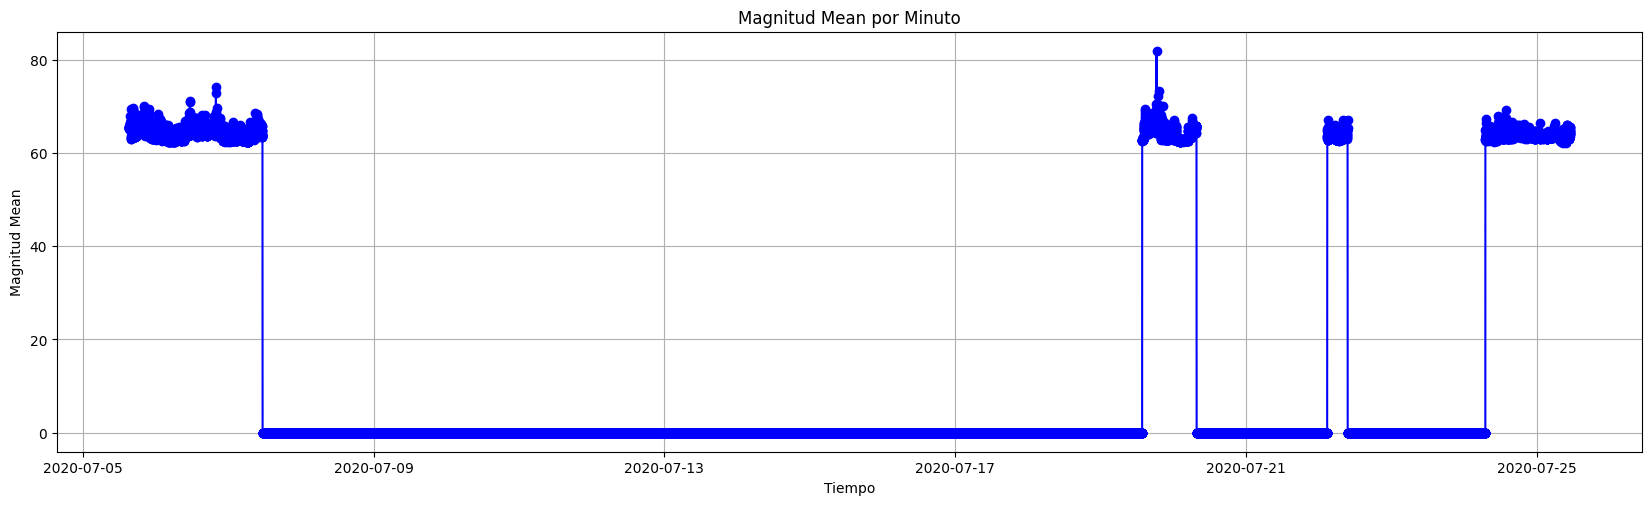

In [489]:
# Graficar magnitude_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['magnitude_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Mean')
plt.title('Magnitud Mean por Minuto')
plt.grid(True)

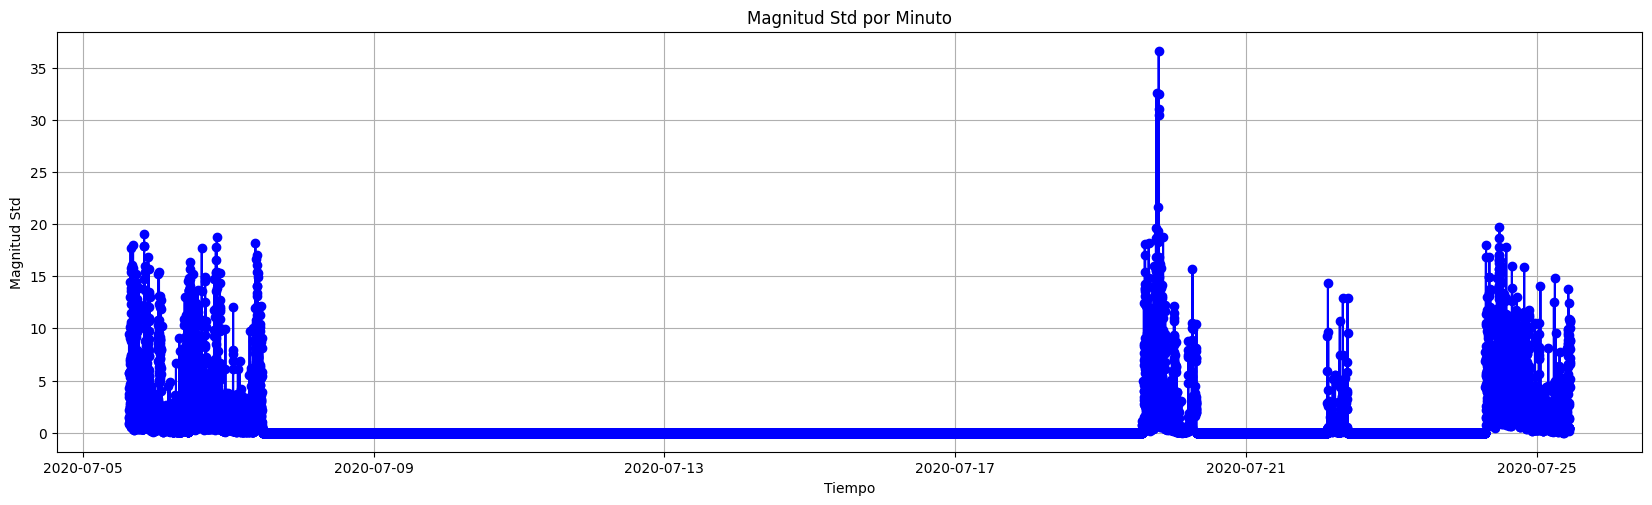

In [490]:
# Graficar magnitude_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['magnitude_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Std')
plt.title('Magnitud Std por Minuto')
plt.grid(True)

#### Ahora por horas

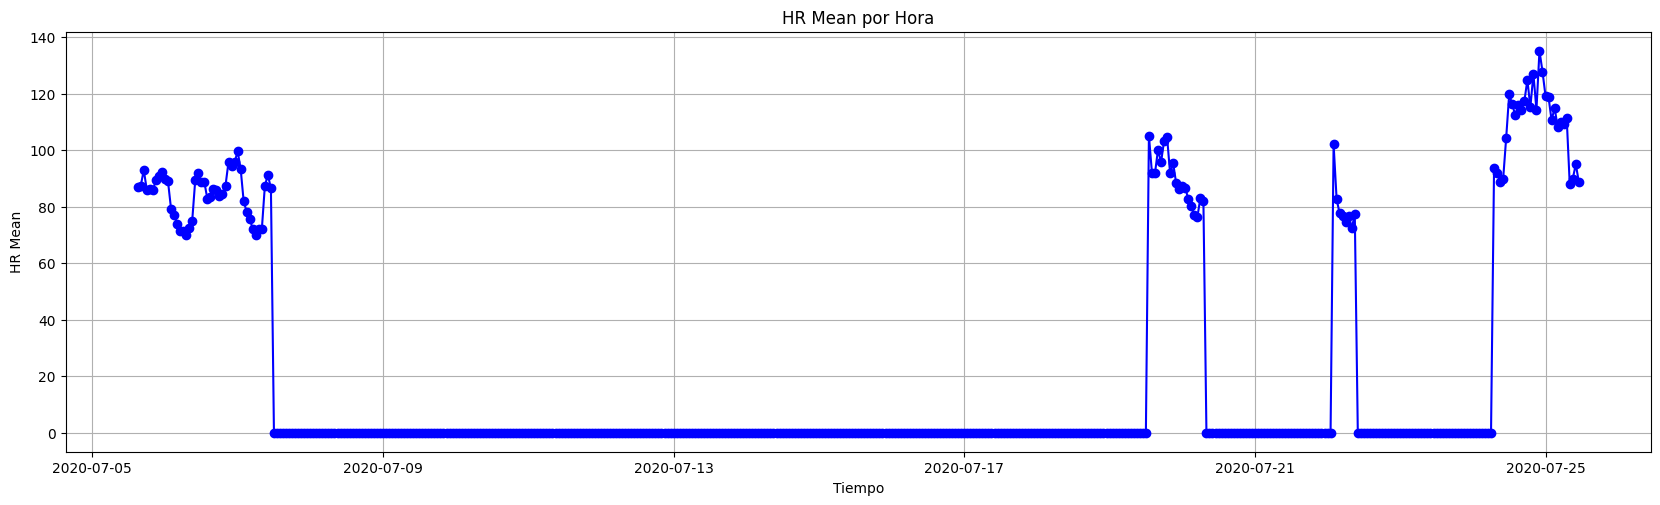

In [491]:
# Graficar hr_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['hr_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Mean')
plt.title('HR Mean por Hora')
plt.grid(True)

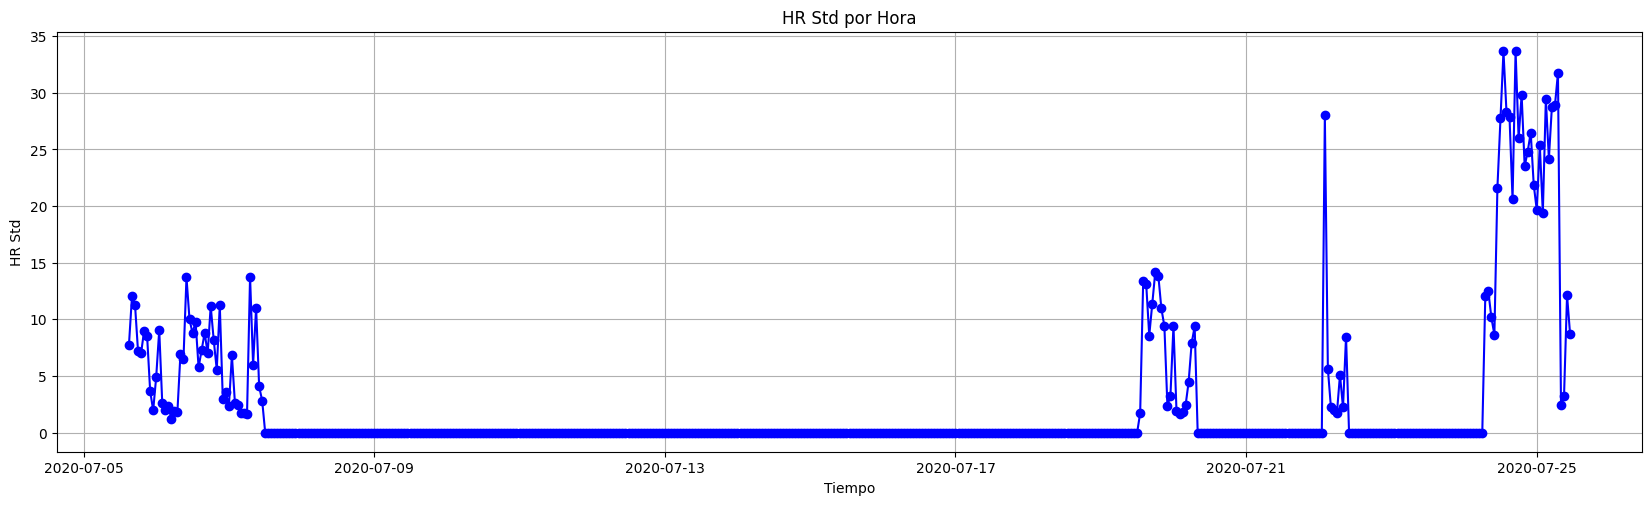

In [492]:
# Graficar hr_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['hr_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Std')
plt.title('HR Std por Hora')
plt.grid(True)

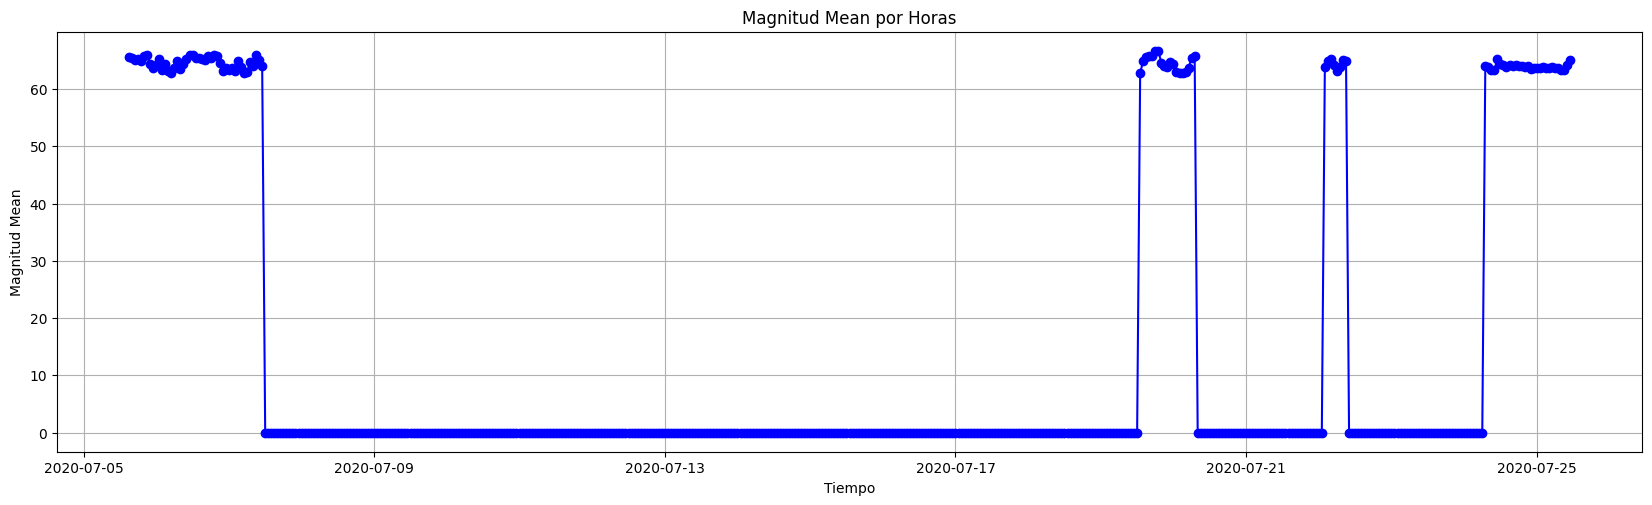

In [493]:
# Graficar magnitude_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['magnitude_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Mean')
plt.title('Magnitud Mean por Horas')
plt.grid(True)

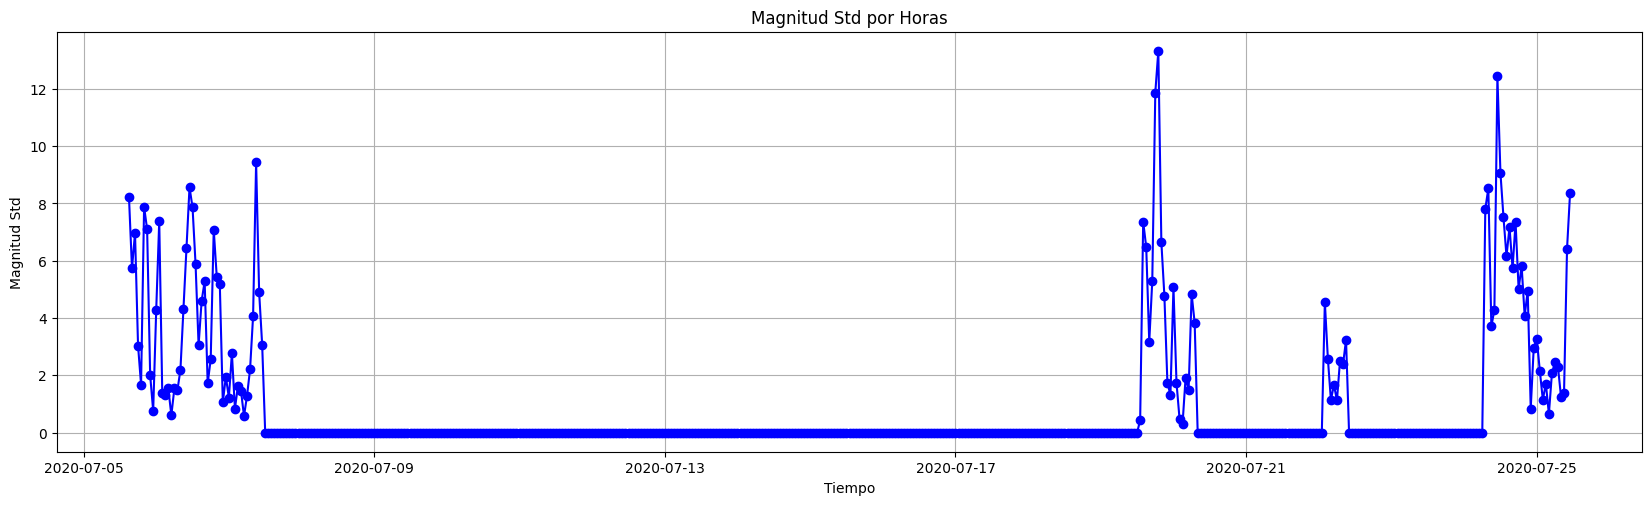

In [494]:
# Graficar magnitude_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['magnitude_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Std')
plt.title('Magnitud Std por Horas')
plt.grid(True)

* Podriamos decir que donde se tienen pendientes pronunciadas y estan llegan a mantenerse en valores distintos al por los siguientes 25 min ( en caso de las graficas por minutos) y 75 min (en caso de las graficas por hora), son la hora de despertar en ese momento del sujeto.

#### Guardamos los datos procesados en csv

In [495]:
combined_df_min.to_csv('ritmo_circadiano_min_'+PACIENTE+'.csv', index=False)
combined_df_hour.to_csv('ritmo_circadiano_hour_'+PACIENTE+'.csv', index=False)